In [1]:
import boto3

boto3.__version__

'1.20.12'

In [2]:
from datetime import datetime as dt
import numpy as np

In [3]:
session = boto3.Session(profile_name='mattermost', region_name="ap-northeast-1")

In [4]:
print(session.get_available_resources())

['cloudformation', 'cloudwatch', 'dynamodb', 'ec2', 'glacier', 'iam', 'opsworks', 's3', 'sns', 'sqs']


In [5]:
cloudwatch = session.resource("cloudwatch")

metric = cloudwatch.Metric('AWS/EC2','CPUUtilization')

response = metric.get_statistics(
    Dimensions=[
        {
            'Name': 'AutoScalingGroupName',
            'Value': 'eksctl-mattermost-staging-test-nodegroup-mattermost-stg-NodeGroup-14V2OIYU7GQS3'
        },
    ],
    StartTime=dt(2022, 6, 14),
    EndTime=dt(2022, 6, 24),
    Period=600,
    Statistics=[
        'Average',
    ],
    # ExtendedStatistics=[
    #     'string',
    # ],
    # Unit='Seconds'|'Microseconds'|'Milliseconds'|'Bytes'|'Kilobytes'|'Megabytes'|'Gigabytes'|'Terabytes'|'Bits'|'Kilobits'|'Megabits'|'Gigabits'|'Terabits'|'Percent'|'Count'|'Bytes/Second'|'Kilobytes/Second'|'Megabytes/Second'|'Gigabytes/Second'|'Terabytes/Second'|'Bits/Second'|'Kilobits/Second'|'Megabits/Second'|'Gigabits/Second'|'Terabits/Second'|'Count/Second'|'None'
)

response

{'Label': 'CPUUtilization',
 'Datapoints': [{'Timestamp': datetime.datetime(2022, 6, 14, 10, 40, tzinfo=tzutc()),
   'Average': 6.237831255876481,
   'Unit': 'Percent'},
  {'Timestamp': datetime.datetime(2022, 6, 18, 11, 20, tzinfo=tzutc()),
   'Average': 4.157500000000001,
   'Unit': 'Percent'},
  {'Timestamp': datetime.datetime(2022, 6, 21, 18, 20, tzinfo=tzutc()),
   'Average': 3.771495283268486,
   'Unit': 'Percent'},
  {'Timestamp': datetime.datetime(2022, 6, 15, 0, 50, tzinfo=tzutc()),
   'Average': 10.20081550145944,
   'Unit': 'Percent'},
  {'Timestamp': datetime.datetime(2022, 6, 19, 1, 30, tzinfo=tzutc()),
   'Average': 4.001831869683657,
   'Unit': 'Percent'},
  {'Timestamp': datetime.datetime(2022, 6, 22, 8, 30, tzinfo=tzutc()),
   'Average': 8.754333333333332,
   'Unit': 'Percent'},
  {'Timestamp': datetime.datetime(2022, 6, 17, 5, 50, tzinfo=tzutc()),
   'Average': 9.208334056026574,
   'Unit': 'Percent'},
  {'Timestamp': datetime.datetime(2022, 6, 20, 12, 50, tzinfo=tzut

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(response["Datapoints"])

df["weekday"] = [x.weekday() for x in df["Timestamp"]]
df["day"] = [x.day for x in df["Timestamp"]]
df["month"] = [x.month for x in df["Timestamp"]]
df["hour"] = [x.hour for x in df["Timestamp"]]
df["minute"] = [x.minute for x in df["Timestamp"]]

df = df.sort_values(["month","day","hour","minute"])

df.index = np.arange(len(df))
df

,Timestamp,Average,Unit,weekday,day,month,hour,minute
0,2022-06-14 00:00:00+00:00,10.421500,Percent,1,14,6,0,0
1,2022-06-14 00:10:00+00:00,7.639667,Percent,1,14,6,0,10
2,2022-06-14 00:20:00+00:00,7.648000,Percent,1,14,6,0,20
3,2022-06-14 00:30:00+00:00,8.299167,Percent,1,14,6,0,30
4,2022-06-14 00:40:00+00:00,8.391337,Percent,1,14,6,0,40
...,...,...,...,...,...,...,...,...
1435,2022-06-23 23:10:00+00:00,9.018169,Percent,3,23,6,23,10
1436,2022-06-23 23:20:00+00:00,7.768668,Percent,3,23,6,23,20
1437,2022-06-23 23:30:00+00:00,8.452320,Percent,3,23,6,23,30
1438,2022-06-23 23:40:00+00:00,7.654679,Percent,3,23,6,23,40


In [8]:
import matplotlib.pyplot as plt

In [9]:
df.drop("Timestamp", axis=1)

,Average,Unit,weekday,day,month,hour,minute
0,10.421500,Percent,1,14,6,0,0
1,7.639667,Percent,1,14,6,0,10
2,7.648000,Percent,1,14,6,0,20
3,8.299167,Percent,1,14,6,0,30
4,8.391337,Percent,1,14,6,0,40
...,...,...,...,...,...,...,...
1435,9.018169,Percent,3,23,6,23,10
1436,7.768668,Percent,3,23,6,23,20
1437,8.452320,Percent,3,23,6,23,30
1438,7.654679,Percent,3,23,6,23,40


In [10]:
df["weekday"].values

array([1, 1, 1, ..., 3, 3, 3])

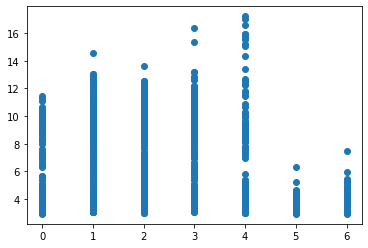

In [11]:
plt.scatter(df["weekday"],df["Average"])

In [12]:
import seaborn as sns; sns.set(font_scale=1.2)

In [13]:
sns.lmplot("Flour", "Sugar", data=df, hue="Type", palette="Set1", fit_reg=False, scatter_kws={"s":70})

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: "None of [Index(['Flour', 'Sugar', 'Type'], dtype='object')] are in the [columns]"

In [51]:
weekly_data.to_csv("cw.csv")

In [50]:
weekly_data = df[["weekday","hour","minute","Average"]]
weekly_data

,weekday,hour,minute,Average
0,1,0,0,10.421500
1,1,0,10,7.639667
2,1,0,20,7.648000
3,1,0,30,8.299167
4,1,0,40,8.391337
...,...,...,...,...
1435,3,23,10,9.018169
1436,3,23,20,7.768668
1437,3,23,30,8.452320
1438,3,23,40,7.654679


In [15]:
weekly_data[weekly_data["weekday"] == 0]

,weekday,day,hour,minute,Average
864,0,20,0,0,9.312846
865,0,20,0,10,8.331000
866,0,20,0,20,8.343000
867,0,20,0,30,7.634500
868,0,20,0,40,8.720000
...,...,...,...,...,...
1003,0,20,23,10,5.098667
1004,0,20,23,20,5.062492
1005,0,20,23,30,6.644163
1006,0,20,23,40,6.365842


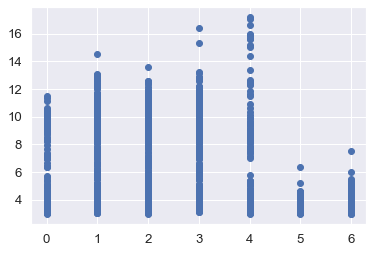

In [16]:
plt.scatter(weekly_data["weekday"],weekly_data["Average"])

In [17]:
weekly_data["Average"].value_counts()

3.816333     2
3.240333     2
8.720000     2
2.987500     2
10.421500    1
            ..
8.102332     1
8.418501     1
8.169336     1
9.049511     1
9.497152     1
Name: Average, Length: 1436, dtype: int64

In [18]:
weekly_data["Average"].value_counts().index[0]

3.8163333333333336

In [19]:
weekly_data["Average"].value_counts()[3.2403333333333335]

2

In [20]:
weekly_data[weekly_data["weekday"]==0]["hour"]

864      0
865      0
866      0
867      0
868      0
        ..
1003    23
1004    23
1005    23
1006    23
1007    23
Name: hour, Length: 144, dtype: int64

In [21]:
weekly_data[weekly_data["weekday"]==0]["Average"]

864     9.312846
865     8.331000
866     8.343000
867     7.634500
868     8.720000
          ...   
1003    5.098667
1004    5.062492
1005    6.644163
1006    6.365842
1007    8.881165
Name: Average, Length: 144, dtype: float64

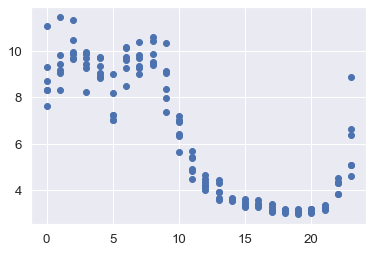

In [22]:
plt.scatter(weekly_data[weekly_data["weekday"]==0]["hour"],weekly_data[weekly_data["weekday"]==0]["Average"])

In [23]:
# weekly_data = weekly_data[weekly_data["weekday"]==0]
weekly_data["ok"]=np.array(1)
weekly_data

/var/folders/rz/yqgs2rws55qdvk0p7vtkrr5m0000gn/T/ipykernel_32876/2524781158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data["ok"]=np.array(1)


,weekday,day,hour,minute,Average,ok
0,1,14,0,0,10.421500,1
1,1,14,0,10,7.639667,1
2,1,14,0,20,7.648000,1
3,1,14,0,30,8.299167,1
4,1,14,0,40,8.391337,1
...,...,...,...,...,...,...
1435,3,23,23,10,9.018169,1
1436,3,23,23,20,7.768668,1
1437,3,23,23,30,8.452320,1
1438,3,23,23,40,7.654679,1


In [24]:
nok_day_below = weekly_data.copy(True)
nok_day_below.loc[:, "Average"] = weekly_data["Average"] - 2
nok_day_below.loc[:, "ok"] = 0
nok_day_below


,weekday,day,hour,minute,Average,ok
0,1,14,0,0,8.421500,0
1,1,14,0,10,5.639667,0
2,1,14,0,20,5.648000,0
3,1,14,0,30,6.299167,0
4,1,14,0,40,6.391337,0
...,...,...,...,...,...,...
1435,3,23,23,10,7.018169,0
1436,3,23,23,20,5.768668,0
1437,3,23,23,30,6.452320,0
1438,3,23,23,40,5.654679,0


In [25]:
nok_day_above = weekly_data.copy(True)
nok_day_above.loc[:, "Average"] = weekly_data["Average"] + 2
nok_day_above.loc[:, "ok"] = 0
nok_day_above


,weekday,day,hour,minute,Average,ok
0,1,14,0,0,12.421500,0
1,1,14,0,10,9.639667,0
2,1,14,0,20,9.648000,0
3,1,14,0,30,10.299167,0
4,1,14,0,40,10.391337,0
...,...,...,...,...,...,...
1435,3,23,23,10,11.018169,0
1436,3,23,23,20,9.768668,0
1437,3,23,23,30,10.452320,0
1438,3,23,23,40,9.654679,0


In [26]:
day = weekly_data.append(nok_day_below).append(nok_day_above).sort_values(by=['hour', 'minute', "Average"])
day.index = np.arange(len(day))
# day = day[day["weekday"] == 0]
day

,weekday,day,hour,minute,Average,ok
0,5,18,0,0,1.547998,0
1,6,19,0,0,1.709657,0
2,5,18,0,0,3.547998,1
3,6,19,0,0,3.709657,1
4,5,18,0,0,5.547998,0
...,...,...,...,...,...,...
4315,1,21,23,50,10.911669,0
4316,3,23,23,50,11.497152,0
4317,3,16,23,50,14.379667,0
4318,3,16,23,50,16.379667,1


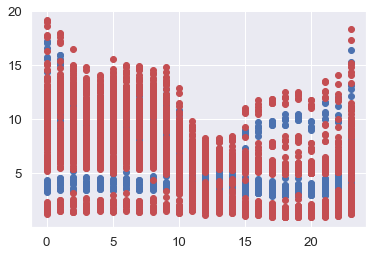

In [27]:
plt.scatter(day[day["ok"] == 1]["hour"], day[day["ok"] == 1]["Average"])
plt.scatter(day[day["ok"] == 0]["hour"], day[day["ok"] == 0]["Average"], c="r")

In [28]:
day[day["Average"] == 1]["hour"]

Series([], Name: hour, dtype: int64)

In [29]:
import tensorflow as tf

tf.__version__

Init Plugin


'2.5.0'

Init Graph Optimizer
Init Kernel


In [30]:
day = pd.get_dummies(day, columns=["weekday","hour","minute"])
day

,day,Average,ok,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,...,hour_20,hour_21,hour_22,hour_23,minute_0,minute_10,minute_20,minute_30,minute_40,minute_50
0,18,1.547998,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,19,1.709657,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,18,3.547998,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,19,3.709657,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,18,5.547998,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,21,10.911669,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4316,23,11.497152,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4317,16,14.379667,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4318,16,16.379667,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split as tts

In [32]:
X_train, X_test, y_train, y_test = tts(day.drop("ok", axis=1), day["ok"], test_size=.2, random_state=42)

X_train, X_test, y_train, y_test

(      day    Average  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
 2441   19   3.883175          0          0          0          0          0   
 1114   18   6.103836          0          0          0          0          0   
 103    14   8.299167          0          1          0          0          0   
 4058   17   3.101671          0          0          0          0          1   
 1910   16   7.266684          0          0          0          1          0   
 ...   ...        ...        ...        ...        ...        ...        ...   
 3444   17   5.298332          0          0          0          0          1   
 466    14  10.593667          0          1          0          0          0   
 3092   15   1.154836          0          0          1          0          0   
 3772   15   5.468328          0          0          1          0          0   
 860    17  10.374167          0          0          0          0          1   
 
       weekday_5  weekday_6  hour_0  .

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),

    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(X_train, y_train, epochs=3000, verbose=0)

2022-06-27 17:18:49.667617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [43]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 3ms/step - loss: 0.1740 - mae: 0.1740


2022-06-27 17:42:51.633868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[0.17396976053714752, 0.17396976053714752]

In [44]:
model.predict(X_test)

2022-06-27 17:43:16.682250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-0.00597932],
       [-0.00597932],
       [ 0.99342316],
       [ 0.99353135],
       [-0.00597932],
       [ 0.99353147],
       [ 0.9934551 ],
       [ 0.99355495],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [ 0.9936896 ],
       [-0.00597932],
       [ 0.99362755],
       [-0.00597932],
       [-0.00597932],
       [ 0.99360126],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [ 0.993519  ],
       [-0.00597932],
       [ 0.9935338 ],
       [ 0.99347097],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [ 0.99347734],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [ 0.99347746],
       [ 0.99353325],
       [-0.00597932],
       [-0.00597932],
       [-0.00597932],
       [ 0.99341476],
       [-0.00597932],
       [ 0.99353975],
       [ 0

In [45]:
y_test

461     0
109     0
2295    1
2589    1
157     0
       ..
1393    1
2426    0
4292    1
3093    0
1543    0
Name: ok, Length: 864, dtype: int64